In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["font.size"] = 14
plt.rcParams["font.weight"] = "bold"
plt.style.use("seaborn-whitegrid")

C:\Users\prana\AppData\Local\Temp\ipykernel_23708\19599041.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [3]:
data = pd.read_csv(r"C:\\Users\\prana\\Documents\\Python data\\insurance (1).csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

C:\Users\prana\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


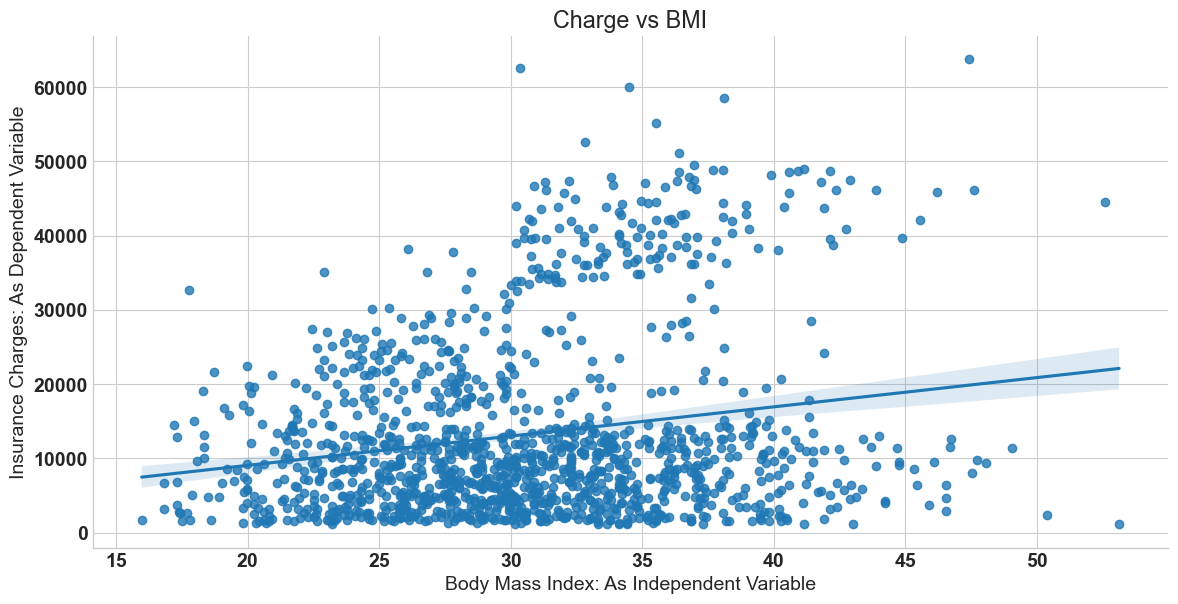

In [6]:
sns.lmplot(x = "bmi", y = "charges", data=data, aspect=2, height=6)
plt.xlabel("Body Mass Index: As Independent Variable")
plt.ylabel("Insurance Charges: As Dependent Variable")
plt.title("Charge vs BMI")
plt.show()

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

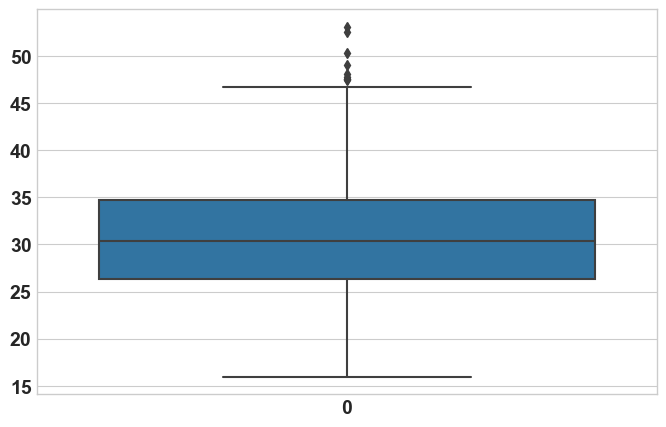

In [8]:
sns.boxplot(data["bmi"])

In [9]:
upper_limit = data["bmi"].quantile(0.99)
lower_limit = data["bmi"].quantile(0.01)

In [10]:
data["bmi"] = np.where(data["bmi"] > upper_limit, upper_limit, data["bmi"])
data["bmi"] = np.where(data["bmi"] < lower_limit, lower_limit, data["bmi"])

<Axes: >

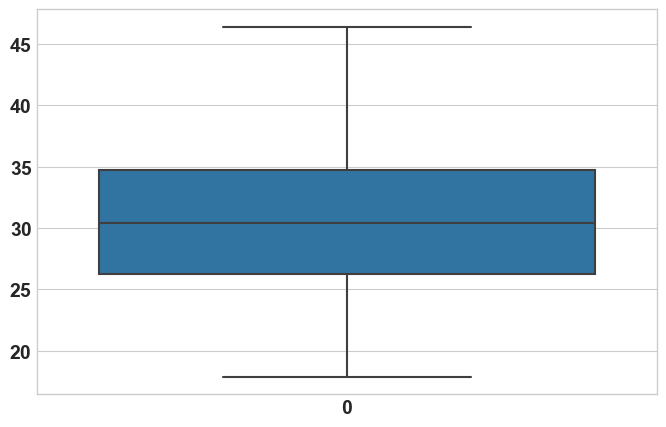

In [11]:
sns.boxplot(data["bmi"])

In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
data["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
data["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [32]:
data["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [22]:
data.bmi = le.fit_transform(data.bmi)
data.bmi.unique()

array([187, 340, 321,  63, 213, 134, 332, 183, 240, 137, 146, 147, 355,
       469, 498, 108, 262,  90, 477, 374, 394, 305, 347, 292, 191, 182,
        70, 315,   0, 401, 381, 148, 207, 200, 403,  25, 320,  31, 409,
       470, 153, 408,  47, 263, 417, 423, 446, 363, 107, 372, 382, 336,
       190, 356, 208, 414, 290, 286,  66, 424, 173, 337, 111, 140,  59,
       214, 452, 397,  94, 112, 205, 193, 294, 174, 346, 233, 380, 468,
       161, 442, 429, 490, 364,  67, 272, 169, 163, 460, 113, 276, 441,
        17,  12, 284, 128, 248, 242, 176, 202, 264, 189, 369, 236, 385,
       300, 206, 526, 168,  78, 419,  87, 216, 277, 344, 210, 199, 425,
       362, 151,  53, 390, 130, 192, 121, 291, 393, 307, 124, 237, 447,
       257, 432, 426,  98, 420, 462, 105, 185, 412, 463, 238, 235, 197,
       416, 325,   8, 493, 253, 330, 430, 186, 223, 150, 261, 496, 265,
       299, 297, 283, 145, 259, 317,   2, 457, 301,  95, 395,  58, 149,
       289, 157,  71,  74, 338, 327, 110, 343, 437, 497, 285, 39

In [23]:
df = pd.get_dummies(data, columns=["sex","smoker","region"],drop_first=True,dtype=int)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,187,0,16884.92400,0,1,0,0,1
1,18,340,1,1725.55230,1,0,0,1,0
2,28,321,3,4449.46200,1,0,0,1,0
3,33,63,0,21984.47061,1,0,1,0,0
4,32,213,0,3866.85520,1,0,1,0,0


In [25]:
data.charges = le.fit_transform(data.charges)
data.charges.unique()

array([1005,   57,  306, ...,   32,   91, 1171], dtype=int64)

<Axes: >

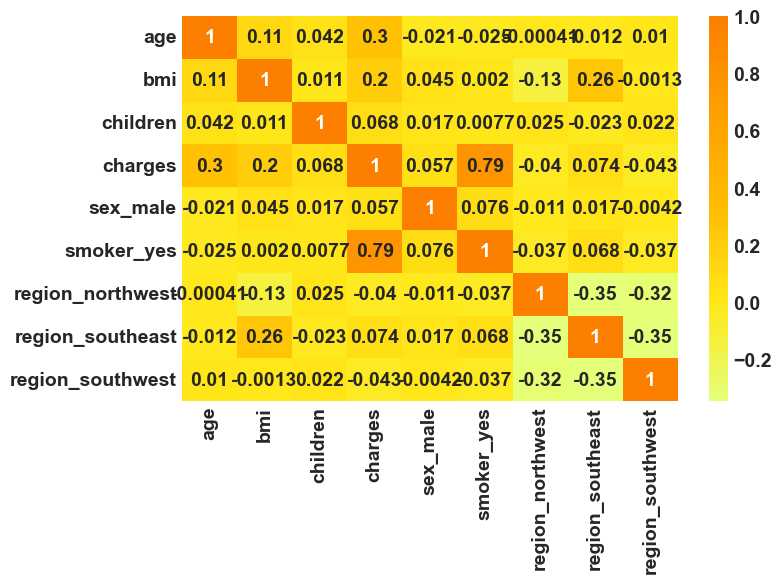

In [26]:
corr = df.corr()
sns.heatmap(corr, cmap="Wistia", annot=True)

C:\Users\prana\AppData\Local\Temp\ipykernel_23708\2924011627.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["charges"],bins=50, color="r", ax=ax)
C:\Users\prana\AppData\Local\Temp\ipykernel_23708\2924011627.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df["charges"]), bins

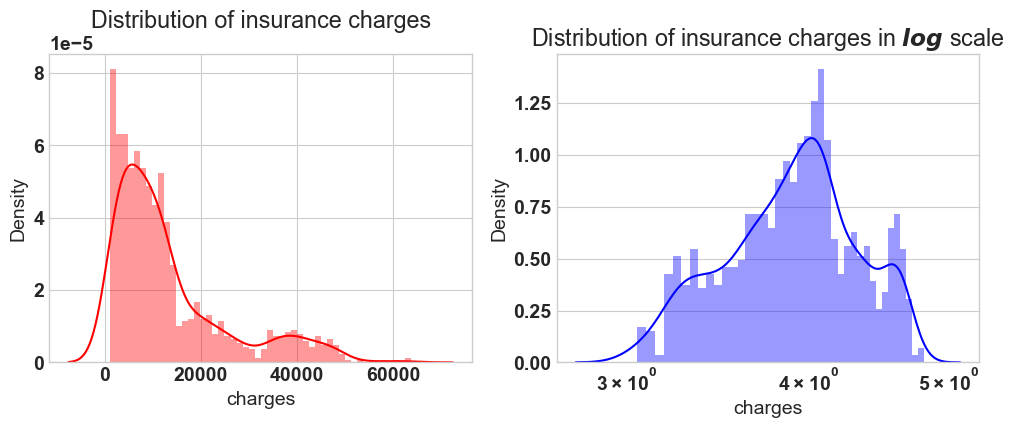

In [27]:
f = plt.figure(figsize=(12, 4))
ax = f.add_subplot(121)
sns.distplot(df["charges"],bins=50, color="r", ax=ax)
ax.set_title("Distribution of insurance charges")

ax = f.add_subplot(122)
sns.distplot(np.log10(df["charges"]), bins=40, color="b", ax=ax)
ax.set_title("Distribution of insurance charges in $log$ scale")
ax.set_xscale("log");


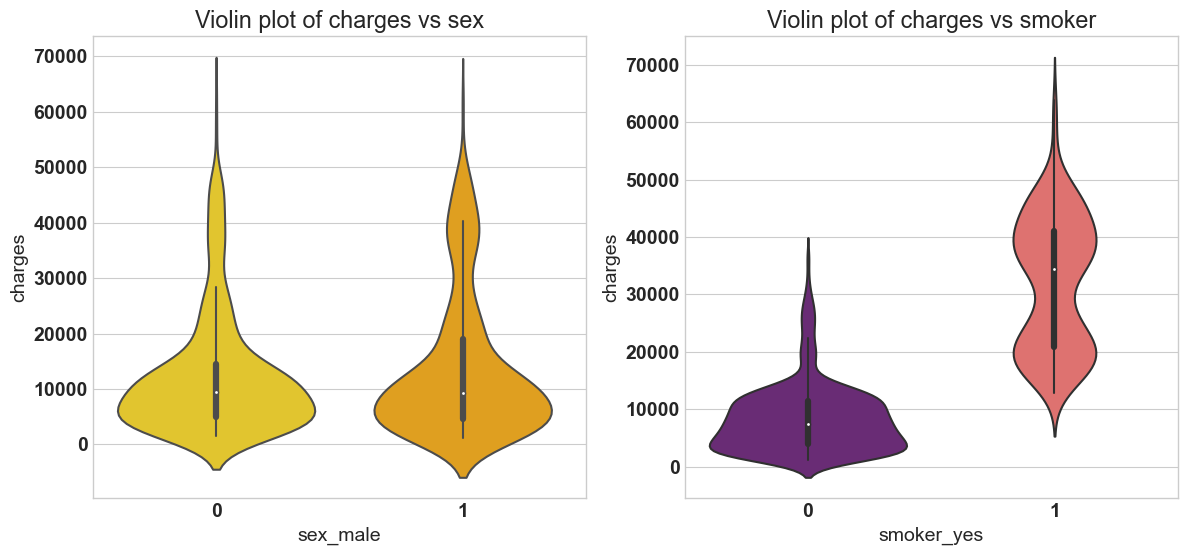

In [30]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x="sex_male", y="charges", data=df, palette="Wistia", ax=ax)
ax.set_title("Violin plot of charges vs sex")

ax = f.add_subplot(122)
sns.violinplot(x="smoker_yes", y="charges", data=df, palette="magma", ax=ax)
ax.set_title("Violin plot of charges vs smoker");


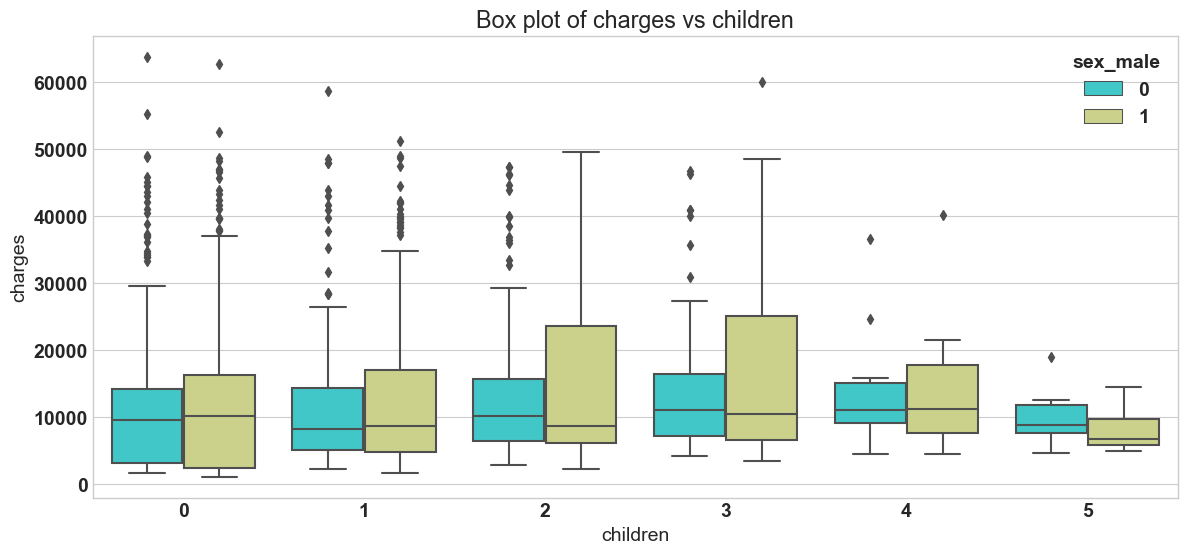

In [34]:
plt.figure(figsize=(14, 6))
sns.boxplot(x = "children", y = "charges", hue="sex_male", data=df, palette="rainbow")
plt.title("Box plot of charges vs children");